In [1]:
#!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
%matplotlib inline

In [3]:
files = np.sort(glob.glob('./NSB/*.csv'))
df_list = []
for file_name in files:
    df = pd.read_csv(file_name, sep=',')
    df_list.append(df)
#df_list[0]
#print(df_list)
#print(files)

In [4]:
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(files))-1)

timestep=np.arange(0,len(files),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

Text(0, 0.5, 'Depth Below Sea Floor (m)')

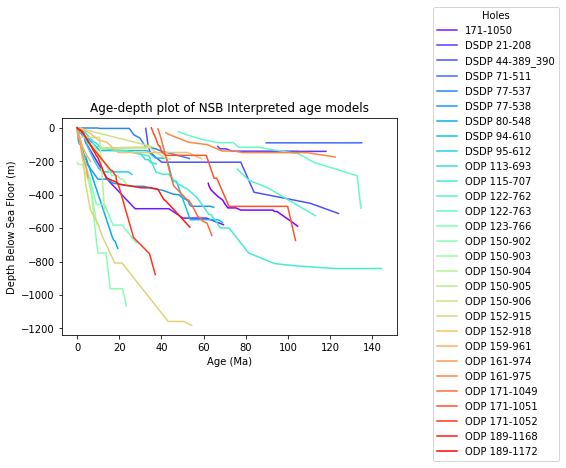

In [12]:
files=np.sort(os.listdir('./NSB'))
holes= [x[:-10] for x in files]
            
for i in np.arange(0,len(df_list),1):
    plt.plot(df_list[i]['Age (Ma)'], df_list[i]['Depth (mbsf)']*-1, label=holes[i], c=c[i])
plt.legend(title='Holes',loc='lower right',bbox_to_anchor=(1.5, -0.6))
plt.title('Age-depth plot of NSB Interpreted age models')
plt.xlabel('Age (Ma)')
plt.ylabel('Depth Below Sea Floor (m)')

Text(0, 0.5, 'maximum Hole Penetration Depth Below Sea Floor (m)')

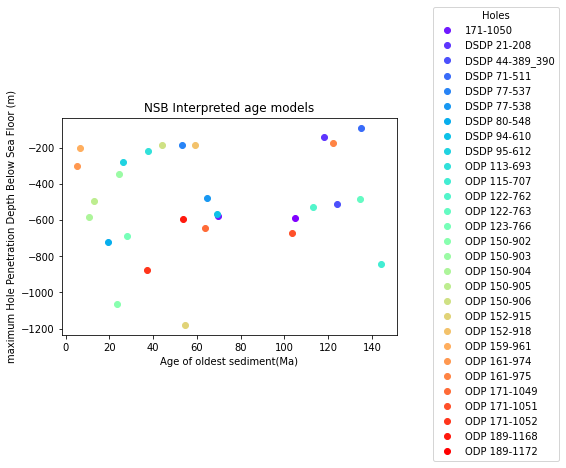

In [13]:
for i in np.arange(0,len(df_list),1):
    plt.plot(np.max(df_list[i]['Age (Ma)']), np.max(df_list[i]['Depth (mbsf)'])*-1,'o', label=holes[i], c=c[i])
plt.legend(title='Holes', loc='lower right',bbox_to_anchor=(1.5, -0.6))
plt.title('NSB Interpreted age models')
plt.xlabel('Age of oldest sediment(Ma)')
plt.ylabel('maximum Hole Penetration Depth Below Sea Floor (m)')


IndexError: list index out of range

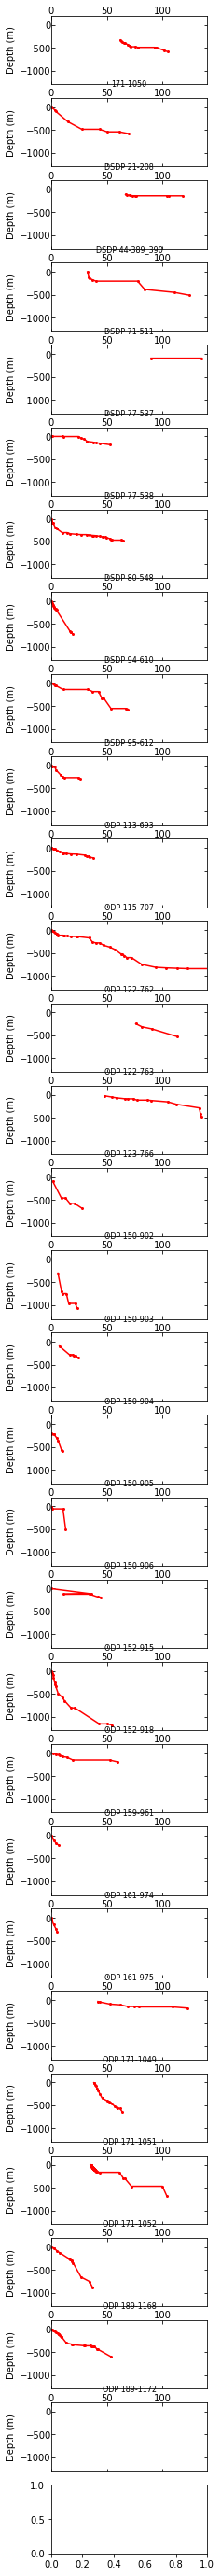

In [14]:
fs=8
ms=2
fig, axs = plt.subplots(len(files),1, figsize=(7.5/2.5, 50))
    
for i in np.arange(0,len(files),1):
    ax = axs[i]
    ax.plot(df_list[i]['Age (Ma)'], df_list[i]['Depth (mbsf)']*-1, '-o', label=holes[i], c='r', markersize=ms)
    ax.set_title(str(holes[i]), pad=-10, fontsize=fs)
    ax.tick_params(axis='both', which='both', direction='in', labeltop=True, labelbottom=False, pad=0.1, top=True, right=True)
    ax.set_xlim(0,140)
    ax.set_ylim(-1300,200)
    ax.set_ylabel('Depth (m)')

axs[len(files)-1]
ax.set_xlabel('Age (Ma)')

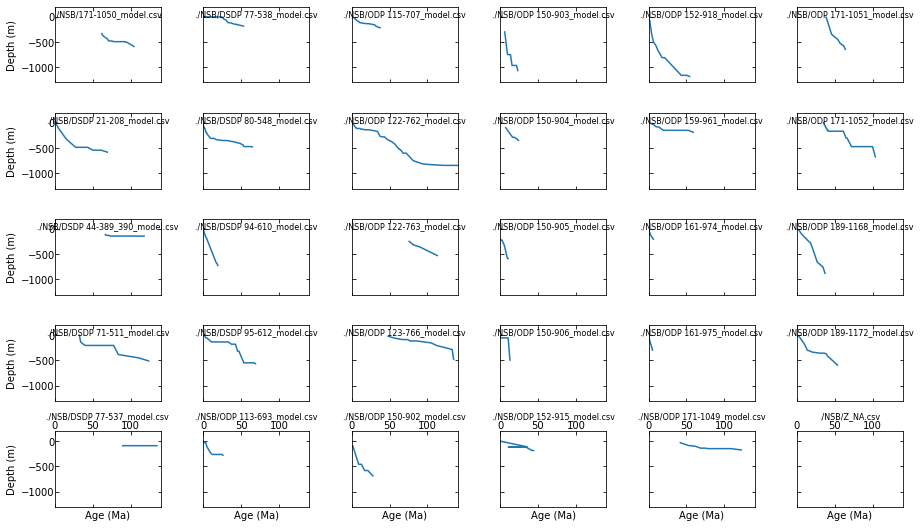

In [16]:
nrows=5
ncols=6
files = np.sort(glob.glob('./NSB/*.csv'))

fig, axs = plt.subplots(nrows,ncols, figsize=(38/2.5, 23/2.5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in np.arange(0,30,5): # There are 5 rows so this controls that the file number gets loaded in multiples of 5
    for f in np.arange(0,5,1):#This controls the row number 
            ax = axs[f,int(i/5)] 
            ax.set_xlim(0,140)
            ax.set_ylim(-1300,200)
#             print(f+i)
            ax.plot(df_list[f+i]['Age (Ma)'], df_list[f+i]['Depth (mbsf)']*-1)#, '-o', c='r', markersize=ms)
            ax.tick_params(axis='both', which='both', direction='in', labeltop=True, labelbottom=False, pad=0.1, top=True, right=True)
            ax.set_title(str(files[f+i]), pad=-10, fontsize=fs)
            ax.set_ylabel('Depth (m)')
            ax.set_xlabel('Age (Ma)')    
for ax in axs.flat:
    ax.label_outer()